# Harnessing Machine Learning for Healthcare: Predicting Death Events of Patients with Prior Heart Failure

## Modeling

One of machine learning's most significant applications is diagnosing and predicting future outcomes of patients, given their demographics and medical histories. By harnessing the data to classify patients as "high risk", healthcare professionals can administer more specialized care and implement proactive measures to save the lives of many.

This project aims to analyze the characteristics of 299 patients who have experienced heart failure. The target variable of the dataset is a death event, denoting whether a patient died during the follow-up period. Patient features include demographics like age and sex, along with medical statistics like CPK level, platelet count, and etc. Following the exploratory data analysis (EDA), modeling will be performed using a multitude of different machine learning models to compare and achieve the highest accuracy. Lastly, a dashboard will be implemented to showcase key statistics, modeling outcomes, and predictions on input patient statistics.

In [2]:
__author__ = 'Jared Paul Guevara'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv('data/heart_failure_train.csv')
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
1,65.0,0,113,1,25,0,497000.00,1.83,135,1,0,67,1
2,85.0,0,23,0,45,0,360000.00,3.00,132,1,0,28,1
3,70.0,1,171,0,60,1,176000.00,1.10,145,1,1,146,0
4,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1


In [4]:
X_train = train.iloc[:, :-1]
display(X_train.head())

y_train = train.iloc[:, -1]
y_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87
1,65.0,0,113,1,25,0,497000.00,1.83,135,1,0,67
2,85.0,0,23,0,45,0,360000.00,3.00,132,1,0,28
3,70.0,1,171,0,60,1,176000.00,1.10,145,1,1,146
4,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113


0    0
1    1
2    1
3    0
4    1
Name: death_event, dtype: int64

In [5]:
X_test = pd.read_csv('data/heart_failure_X_test.csv')
y_test = pd.read_csv('data/heart_failure_y_test.csv')

In [6]:
log_pipe = make_pipeline(StandardScaler(), LogisticRegression())
svc_pipe = make_pipeline(StandardScaler(), SVC())
rfc_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

model_names = {0 : "Logistic Regression",
               1 : "Support Vector Classifier",
               2 : "Random Forest Classifier"}

models = [log_pipe, svc_pipe, rfc_pipe]
preds = []
for model in models:
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    preds.append((round(accuracy_score(train_preds, y_train), 2), round(cross_val_score(model, X_train, y_train, cv=10).mean(), 2)))

for i, pred in enumerate(preds):
    print(f'Accuracy metrics of {model_names[i]} model:\nTraining accuracy: {pred[0]}\nCross-validation accuracy across 10 folds: {pred[1]}\n')

Accuracy metrics of Logistic Regression model:
Training accuracy: 0.87
Cross-validation accuracy across 10 folds: 0.83

Accuracy metrics of Support Vector Classifier model:
Training accuracy: 0.92
Cross-validation accuracy across 10 folds: 0.8

Accuracy metrics of Random Forest Classifier model:
Training accuracy: 1.0
Cross-validation accuracy across 10 folds: 0.88



Considering that the Random Forest Classifier had the highest training and cross-validation accuracy, this will be the model used to predict patient outcomes, but not before performing some hyperparameter optimization. To do so, a randomized search of parameters will be performed using sklearn's `RandomizedSearchCV` function, which allows a range of inpute parameters to be searched through randomly, in order to identify the best performing values.

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(1, 1000),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(1, 10),
    'min_samples_leaf': randint(2, 10),
    'max_leaf_nodes': randint(1, 100),
    'max_features': ['sqrt', 'log2', 12, 6],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rfc = RandomForestClassifier()

rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, scoring='accuracy', cv=10, random_state=42)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f780badb3a0>,
                                        'max_features': ['sqrt', 'log2', 12, 6],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastruct...rozen object at 0x7f780bb3acb0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f780badbd60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f78098d25c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f78098d16c0>},
                   random_state=42, scoring='accuracy')

In [8]:
optimal_params = rand_search.best_params_
optimal_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(**optimal_params))

optimal_pipe.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
print(f'Optimal model metrics:\nTraining accuracy: {accuracy_score(train_preds, y_train)}\nCross-validation accuracy: {round(cross_val_score(model, X_train, y_train, cv=10).mean(), 2)}\nTesting accuracy: {round(accuracy_score(test_preds, y_test), 2)}')

Optimal model metrics:
Training accuracy: 1.0
Cross-validation accuracy: 0.87
Testing accuracy: 0.78


Our final model was able to achieve a testing accuracy of 0.77, but two important metrics of binary classification are F1 score and the ROC curve. F1 score is the harmonic mean between precision and recall, which are both performance metrics that describe positive predictive value and sensitivity of the model. The receiver operating curve (ROC) plots the true positive rate vs. the false positive rate, which allows for the performance of the model to be viewed visually. An area under the curve (AUC) closer to 1.0 is indicative of a strong model, whereas an AUC closer to 0.5 would mean that the model has no better predictive value than a random classifer.

F1 score of model: 0.68


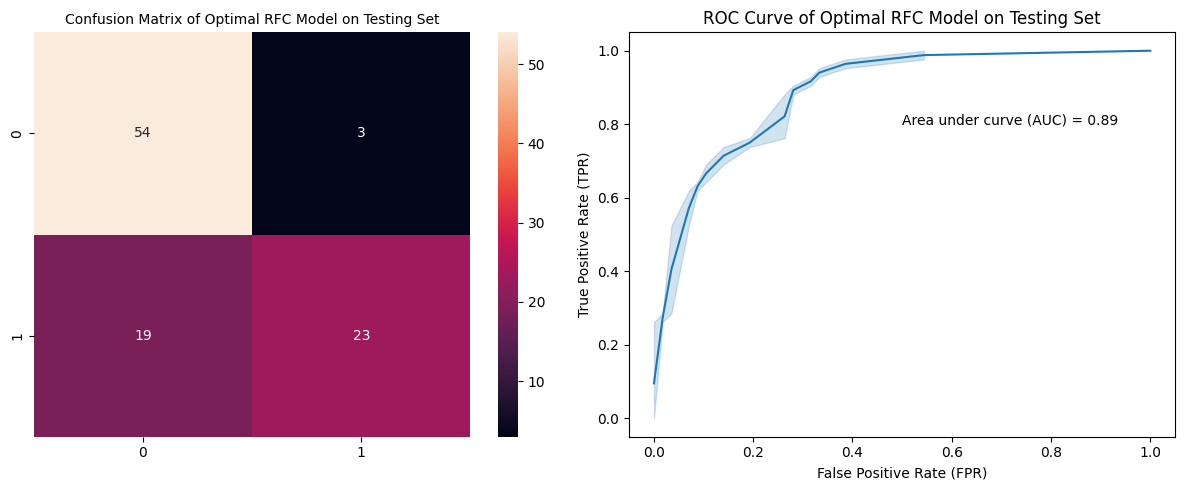

In [50]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc

# F1 Score
print(f'F1 score of model: {round(f1_score(y_test, test_preds), 2)}')

# Create subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figure size as needed

# Confusion Matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, test_preds)), annot=True, ax=axes[0])
axes[0].set_title('Confusion Matrix of Optimal RFC Model on Testing Set', fontsize=10)

# ROC Curve
test_probs = optimal_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, test_probs)
sns.lineplot(x=fpr, y=tpr, ax=axes[1])
axes[1].annotate(f'Area under curve (AUC) = {round(auc(fpr, tpr), 2)}', (0.5, 0.8))
axes[1].set_xlabel('False Positive Rate (FPR)')
axes[1].set_ylabel('True Positive Rate (TPR)')
axes[1].set_title('ROC Curve of Optimal RFC Model on Testing Set')

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
import pickle

with open('heart_failure_predictor.pkl','wb') as f:
    pickle.dump(optimal_pipe, f)